In [243]:
from sklearn.datasets import make_moons


In [244]:
n_samples = 1000

x, y = make_moons(n_samples, noise = 0.03, random_state = 42)



In [245]:
import torch
from torch import nn

X = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]



(tensor([[-0.0093,  0.3910],
         [ 0.9546, -0.4738],
         [ 0.9185, -0.4252],
         [ 0.4128, -0.3764],
         [-0.8453,  0.5288]]),
 tensor([1., 1., 1., 1., 0.]))

In [246]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [247]:
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"
device
class MoonModel(nn.Module):
    
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(2, 50)
        self.layer_2 = nn.Linear(50, 1)

    def forward(self, x):
       return self.layer_2(F.leaky_relu(self.layer_1(x)))

model_0 = MoonModel()

In [248]:
loss_fn = nn.BCEWithLogitsLoss() #Loss function for binary classifier
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.1)

In [249]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [250]:
untrained_probabilities = torch.sigmoid(model_0(x_test.to(device)))
print(untrained_probabilities)
untrained_predictions = torch.round(untrained_probabilities)
print(untrained_predictions)

tensor([[0.4499],
        [0.4662],
        [0.4312],
        [0.4727],
        [0.4274],
        [0.4275],
        [0.4491],
        [0.4440],
        [0.4324],
        [0.4668],
        [0.4753],
        [0.4512],
        [0.4465],
        [0.4281],
        [0.4872],
        [0.4285],
        [0.4643],
        [0.4817],
        [0.4461],
        [0.4844],
        [0.4674],
        [0.5014],
        [0.4440],
        [0.4841],
        [0.4562],
        [0.4473],
        [0.4924],
        [0.4982],
        [0.4870],
        [0.4285],
        [0.4717],
        [0.4577],
        [0.4749],
        [0.4270],
        [0.4770],
        [0.4607],
        [0.4542],
        [0.4297],
        [0.4266],
        [0.4284],
        [0.4436],
        [0.4351],
        [0.4663],
        [0.4976],
        [0.4760],
        [0.4634],
        [0.4990],
        [0.4684],
        [0.4610],
        [0.4280],
        [0.4740],
        [0.4757],
        [0.4988],
        [0.4961],
        [0.4773],
        [0

In [251]:
#Building a training and testing loop

epochs = 1000

for epoch in range(epochs):
    
    model_0.train() #put in training mode
    
    y_logits = (model_0(x_train.to(device)).squeeze())
    y_predictions = torch.sigmoid(y_logits)
    
    loss = loss_fn(y_logits, y_train)
    
    accuracy = accuracy_fn(y_train, y_predictions)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    #testing
    model_0.eval()
    
    with torch.inference_mode():
        #Forward pass
        test_logits = model_0(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        accuracy = accuracy_fn(y_test, test_pred)
        
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}% | Test loss: {test_loss:.5f}, Test acc: {accuracy:.2f}%")


Epoch: 0 | Loss: 0.73519, Accuracy: 50.00% | Test loss: 0.69451, Test acc: 50.00%
Epoch: 10 | Loss: 0.50478, Accuracy: 77.00% | Test loss: 0.50770, Test acc: 77.00%
Epoch: 20 | Loss: 0.41807, Accuracy: 77.50% | Test loss: 0.43126, Test acc: 77.50%
Epoch: 30 | Loss: 0.37395, Accuracy: 78.50% | Test loss: 0.39042, Test acc: 78.50%
Epoch: 40 | Loss: 0.34766, Accuracy: 80.00% | Test loss: 0.36482, Test acc: 80.00%
Epoch: 50 | Loss: 0.32989, Accuracy: 81.00% | Test loss: 0.34664, Test acc: 81.00%
Epoch: 60 | Loss: 0.31664, Accuracy: 82.00% | Test loss: 0.33248, Test acc: 82.00%
Epoch: 70 | Loss: 0.30603, Accuracy: 83.00% | Test loss: 0.32074, Test acc: 83.00%
Epoch: 80 | Loss: 0.29717, Accuracy: 84.00% | Test loss: 0.31065, Test acc: 84.00%
Epoch: 90 | Loss: 0.28950, Accuracy: 85.00% | Test loss: 0.30175, Test acc: 85.00%
Epoch: 100 | Loss: 0.28275, Accuracy: 85.00% | Test loss: 0.29379, Test acc: 85.00%
Epoch: 110 | Loss: 0.27675, Accuracy: 85.50% | Test loss: 0.28666, Test acc: 85.50%
Epo

In [252]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


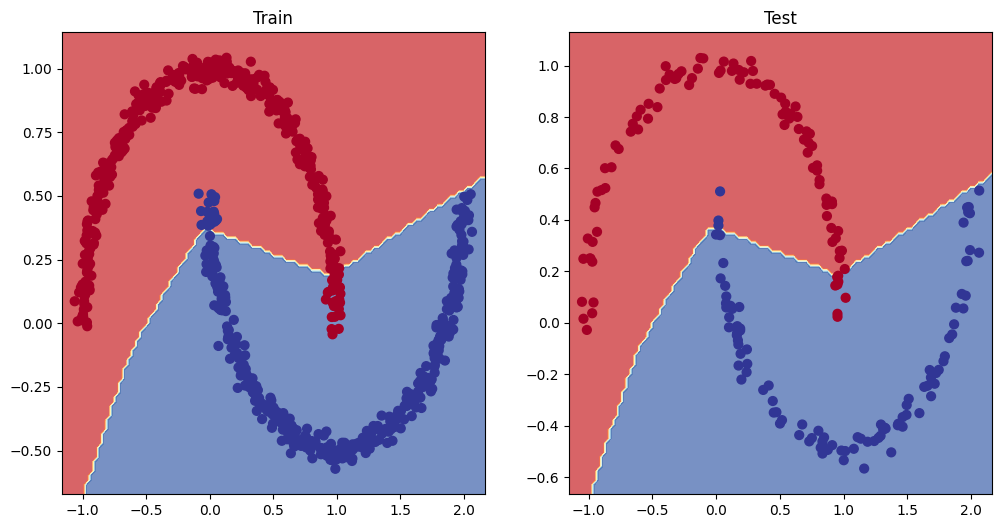

In [253]:
# Plot decision boundaries for training and test sets
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)